In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
# No null values in the dataset

In [7]:
df.describe().round(1)

,math score,reading score,writing score
count,1000.0,1000.0,1000.0
mean,66.1,69.2,68.1
std,15.2,14.6,15.2
min,0.0,17.0,10.0
25%,57.0,59.0,57.8
50%,66.0,70.0,69.0
75%,77.0,79.0,79.0
max,100.0,100.0,100.0


In [8]:
df.rename(columns={"race/ethnicity":"race"}, inplace=True)

# EDA

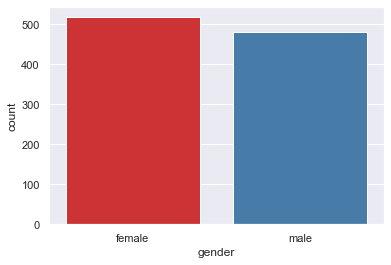

In [9]:
sns.set(style='darkgrid')
sns.countplot(df.gender, palette = 'Set1')


In [10]:
import matplotlib

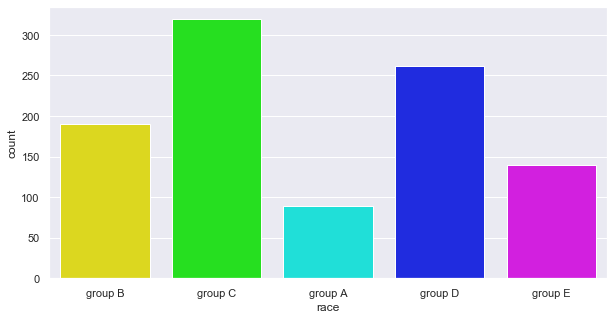

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(df.race, palette="hsv")

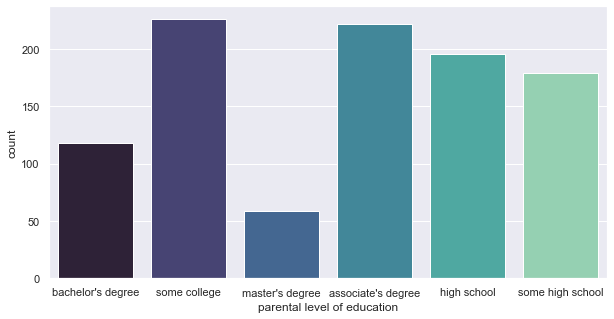

In [136]:
plt.figure(figsize=(10,5))
sns.countplot(df['parental level of education'], palette='mako')

In [14]:
# Majority of the students have above average parental level of education

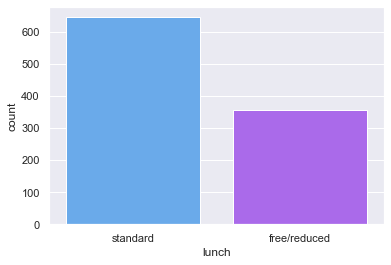

In [15]:
sns.countplot(df.lunch, palette = 'cool')

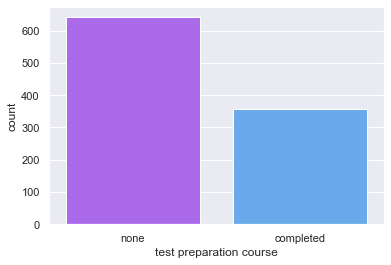

In [16]:
sns.countplot(df['test preparation course'], palette = 'cool_r')

In [17]:
df['test preparation course'].value_counts()/len(df)*100

none         64.2
completed    35.8
Name: test preparation course, dtype: float64

In [18]:
df['total'] = df['reading score']+df['writing score']+df['math score']

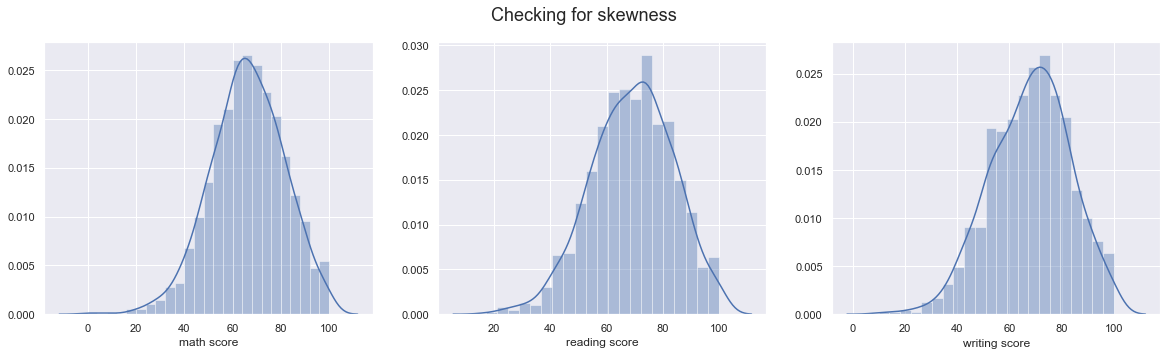

In [19]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.distplot(df['math score'])

plt.subplot(1,3,2)
sns.distplot(df['reading score'])

plt.subplot(1,3,3)
sns.distplot(df['writing score'])

plt.suptitle('Checking for skewness', fontsize = 18)
plt.show()

In [20]:
# No skewness was be found on any of the scores.

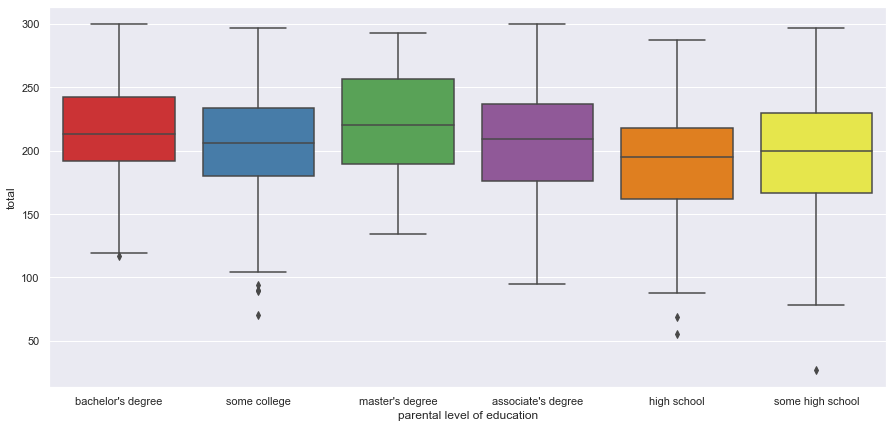

In [21]:
plt.figure(figsize=(15,7))
sns.boxplot(x = df['parental level of education'], y = df['total'],  palette='Set1')

In [22]:
# It can be observed than students with parental level of education as bachelor's degree or above has better mean

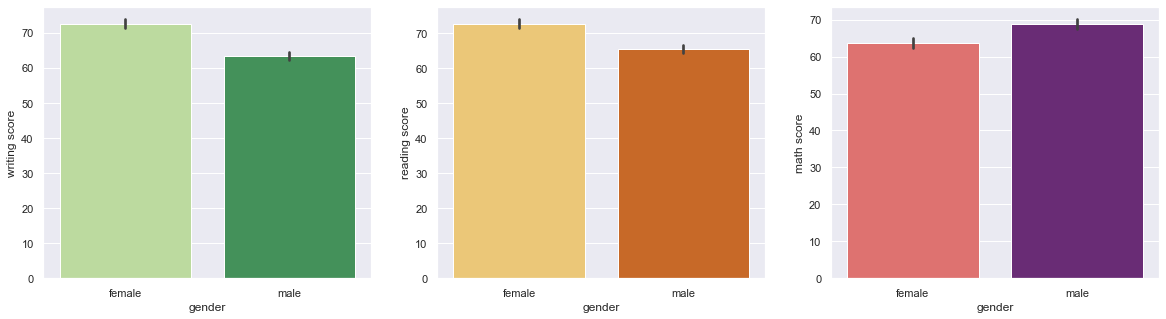

In [76]:
plt.figure(figsize=(20,5))


plt.subplot(1,3,1)
sns.barplot(y=df['writing score'], x=df.gender, palette='YlGn')

plt.subplot(1,3,2)
sns.barplot(y=df['reading score'], x=df.gender, palette='YlOrBr')

plt.subplot(1,3,3)
sns.barplot(y=df['math score'], x=df.gender, palette='magma_r')

plt.show()

In [24]:
# In reading and writing section, generally females were found to have better scores than male, 
# however in math score male have performed better than female

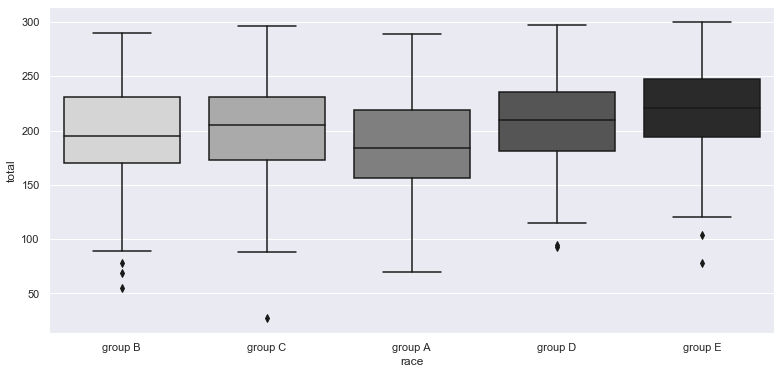

In [25]:
plt.figure(figsize=(13,6))
sns.boxplot(x = df['race'],y = df.total, palette = "binary")

In [26]:
### There is not much difference in marks between races

<Figure size 1224x504 with 0 Axes>

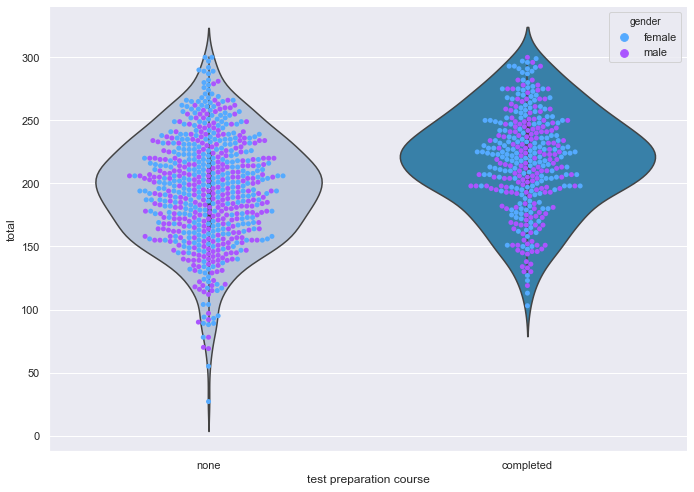

In [109]:
plt.figure(figsize=(17,7))
sns.catplot(y = 'total', height = 7, aspect = 1.4, x = 'test preparation course', kind='violin', data = df, palette='PuBu')
sns.swarmplot(y = df['total'],hue = df['gender'], x = df['test preparation course'], palette='cool')

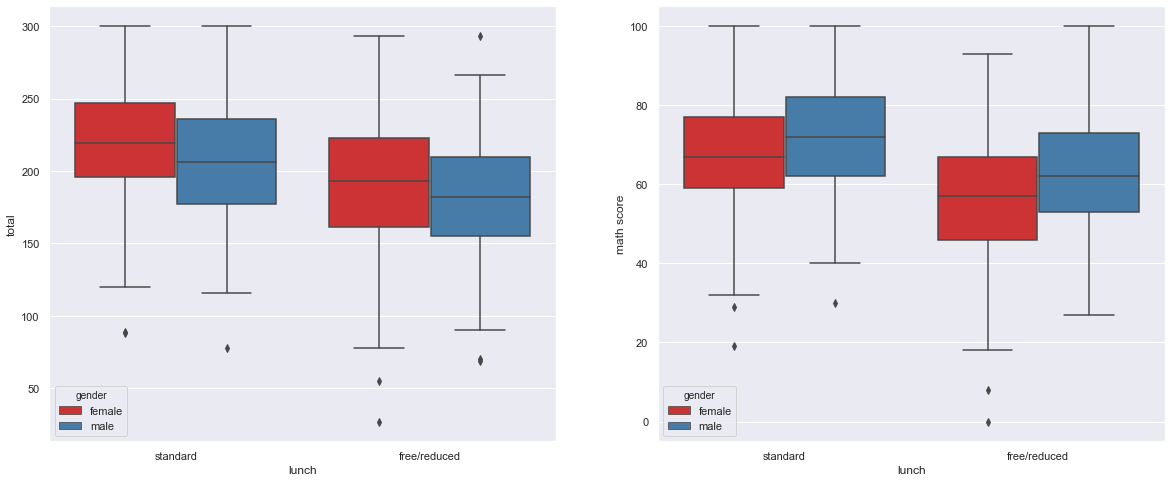

In [27]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.boxplot(x = df['lunch'],y = df.total, hue = df.gender, palette = "Set1")

plt.subplot(1,2,2)
sns.boxplot(x = df['lunch'],y = df['math score'], hue = df.gender, palette = "Set1")

In [28]:
# The students who had standard lunch option secured more marks than the free/reduced lunch category. And here also
# females were seen to perform better than males in both lunch categories

# However the male students continue to perform better than female in math score in both lunch category and standard 
# is seen performing slightly better than free/reduced lunch category

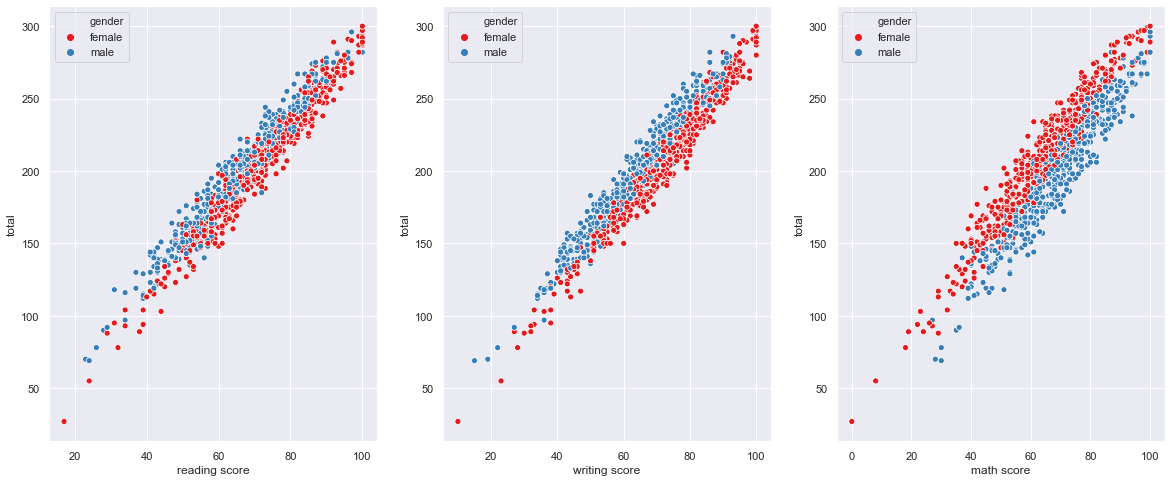

In [124]:
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
sns.scatterplot(df['reading score'],df['total'],hue=df.gender,palette="Set1")

plt.subplot(1,3,2)
sns.scatterplot(df['writing score'],df['total'],hue=df.gender,palette="Set1")

plt.subplot(1,3,3)
sns.scatterplot(x=df['math score'],y = df['total'], hue=df.gender,palette="Set1")

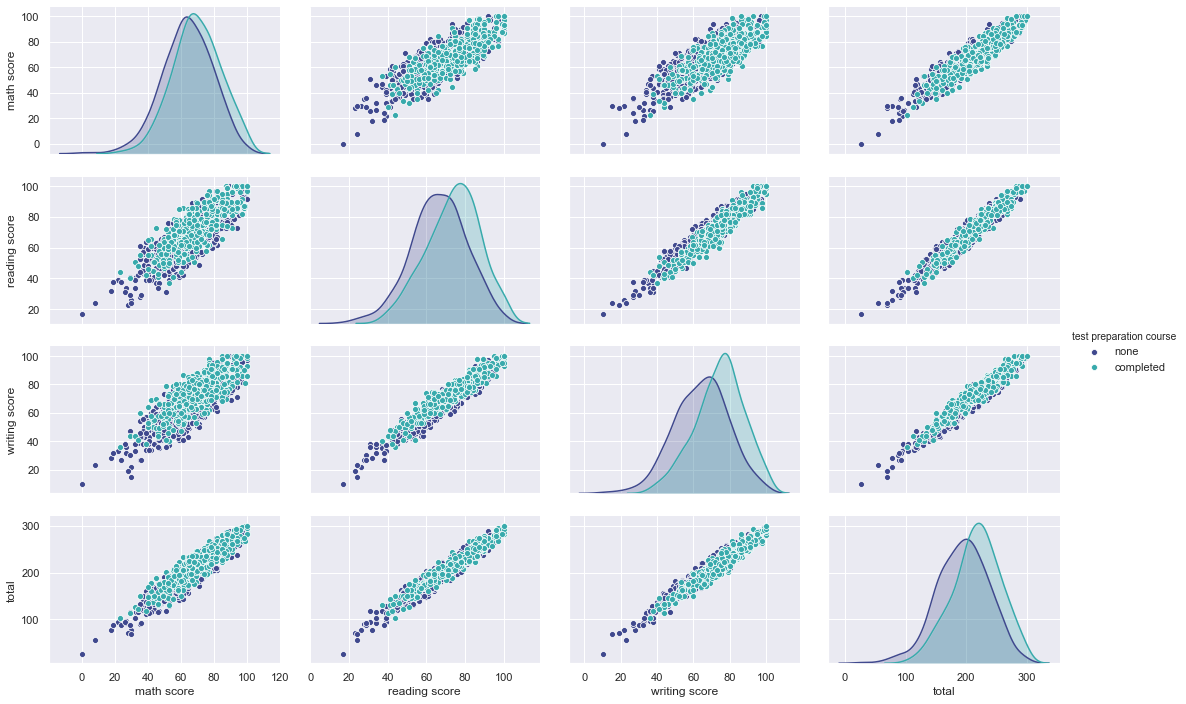

In [134]:
sns.pairplot(df, hue = "test preparation course", palette='mako', aspect=1.5)

In [31]:
# It is evident that the student who completed the test preparation course secured better marks than those who didn't

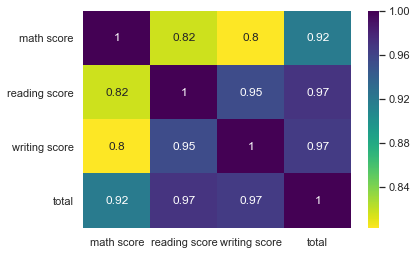

In [146]:
sns.heatmap(df.corr(), cmap='viridis_r', annot = True)

In [145]:
toppers = df[(df['math score'] > 90) & (df['reading score'] > 90) & (df['writing score']>90)]\
.sort_values(by=['total'],ascending=False)

toppers

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score,total
962,female,group E,associate's degree,standard,none,100,100,100,300
458,female,group E,bachelor's degree,standard,none,100,100,100,300
916,male,group E,bachelor's degree,standard,completed,100,100,100,300
114,female,group E,bachelor's degree,standard,completed,99,100,100,299
179,female,group D,some high school,standard,completed,97,100,100,297
712,female,group D,some college,standard,none,98,100,99,297
625,male,group D,some college,standard,completed,100,97,99,296
165,female,group C,bachelor's degree,standard,completed,96,100,100,296
903,female,group D,bachelor's degree,free/reduced,completed,93,100,100,293
149,male,group E,associate's degree,free/reduced,completed,100,100,93,293


In [139]:
# The 2 out of 3 students who scored full marks didn't compete the test preparation course.
# Also 3 out of top 23 students were only free/reduced.
# Out of top 23 students only 6 were male

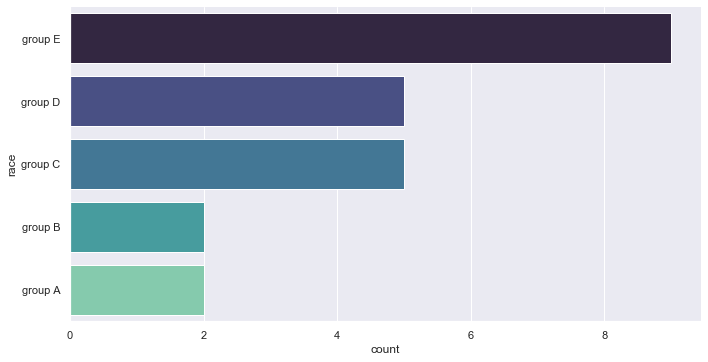

In [143]:
sns.catplot(y= "race" , kind = "count", height = 5, aspect=2,  data = toppers, palette = 'mako')